Quickstart
=================
This is a minimal example to demonstrate how to setup an run a simulation in pyGDM. For more examples, please have a look at the **tutorials** and **examples** sections.

We start by loading the pyGDM modules that we are going to use:

Load the modules
-------------------

In [1]:
## --- Load the pyGDM modules 
from pyGDM2 import structures
from pyGDM2 import materials
from pyGDM2 import fields
from pyGDM2 import core
from pyGDM2 import visu
from pyGDM2 import tools

Now we have to setup the actual simulation. This contains (1) the nano-particle geometry and its environment and (2) the incident electro-magnetic field.
Finally we need to create an instance of a *simulation* object which contains the above mentioned information.

Setup (1): Particle geometry and environment
--------------------------------------

In [2]:
## --- stepsize on the discretization grid
step = 20
## --- structure: sphere of 120nm radius discretized on a cubic lattice
geometry = structures.sphere(step, R=6, mesh='cube')
## --- get the renormalization factor for a cubic mesh
norm = structures.get_normalization(mesh='cube')
## --- constant dielectric function,
material = materials.dummy(2.0)

## --- we place the sphere in vacuum (--> no substrate: n1 = n2)
n1 = n2 = 1.0

## --- finally: wrap it all up in the "structure" object
struct = structures.struct(step, geometry, material, n1,n2, norm)

/home/wiecha/.local/lib/python2.7/site-packages/pyGDM2/structures.py:104: UserWarning: Minimum structure Z-value lies below substrate level! Shifting structure bottom to Z=step/2.
  " Shifting structure bottom to Z=step/2.")


Setup (2): Fundamental (incident) field
---------------------------------------------

In [3]:
## --- for now, we want a simple plane wave
field_generator = fields.planewave

## --- the configuration is passed via a list "wavelengths", 
## --- containing the wavelengths (in nm): 
wavelengths = [400]
## --- ... and a dictionary with all other kwargs that are
## --- available for the selected field-generator. The wavelength is
## --- treated seperately because pyGDM is a frequency-domain 
## --- solver. The main inversion problem will be solved once for
## --- each wavelength and then evaluated for every field 
## --- configuration.
## --- For now, we want to simulate simply a single incident field.
## --- We us a polarization along X (theta=0) and a k-vector along -z,
## --- i.e. incident from "the top" (kSign=-1):
kwargs = dict(theta=[0], kSign=[-1])

## --- finally: wrap it up in the "efield" object
efield = fields.efield(field_generator, 
               wavelengths=wavelengths, kwargs=kwargs)

Setup (3): Wrap all up in the *simulation* object
--------------------------------------------

In [4]:
## --- the "simulation"-object contains all above information
## --- defining the numerical experiment
sim = core.simulation(struct, efield)

Print information about the simulation
---------------------------------------

In [5]:
## --- let's get a summary of the simulation config.
print sim


 =============== GDM Simulation Information ===============
precision: <type 'numpy.float32'> / <type 'numpy.complex64'>


 ------ nano-object -------
   Homogeneous object. 
   material:             "constant index material, n=(2+0j)"
   mesh type:            cubic
   nominal stepsize:     20nm
   nr. of meshpoints:    1021

 ----- incident field -----
   field generator: "planewave"
   1 wavelengths between 400.0 and 400.0nm
   1 incident field configurations per wavelength

 ------ environment -------
   n3 = (1+0j)  <-- top
   n2 = (1+0j)  <-- structure zone (height "spacing" = 5000.0nm)
   n1 = (1+0j)  <-- substrate

 ===== *core.scatter* ======
   NO self-consistent fields


Plot structure geometry
--------------------------------------------

Let's see what the structure looks like

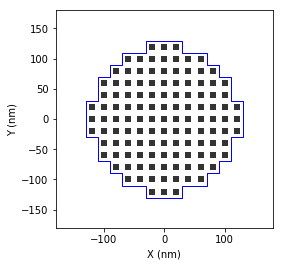

In [6]:
im = visu.structure(sim, show=False)
ct = visu.structure_contour(sim, show=True)

Run the simulation
--------------------

In [7]:
E = core.scatter(sim)

timing 400.00nm:     1117.9 ms


Visualize the result
-------------------------

Let's see what we got. We want to plot the real part of the electric field inside the nanoparticle. We will also add a plot of the structure's contour and do this for projections on all three planes of the carthesian coordinate system:

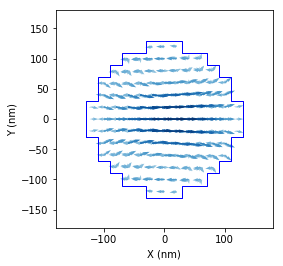

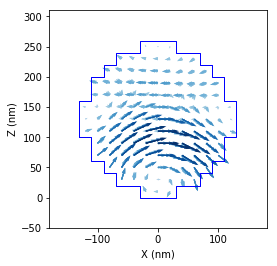

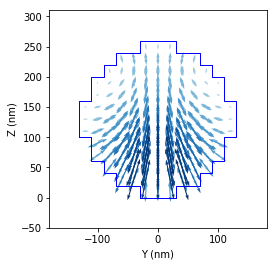

In [8]:
## --- plot the near-field inside the sphere
## using first (of one) field-config (=index 0)
qv = visu.vectorfield_by_fieldindex(sim, 0, projection='XY', show=False)
ct = visu.structure_contour(sim, projection='XY', show=True)

qv = visu.vectorfield_by_fieldindex(sim, 0, projection='XZ', show=False)
ct = visu.structure_contour(sim, projection='XZ', show=True)

qv = visu.vectorfield_by_fieldindex(sim, 0, projection='YZ', show=False)
ct = visu.structure_contour(sim, projection='YZ', show=True)

**Note:** Here we implicitly introduced the *fieldindex*, used throughout pyGDM. We plotted the field with fild_index "0": 

    visu.vectorfield_by_fieldindex(sim, 0, ...)
  
pyGDM will automatically generate all possible permutations of field-configurations described in the *efield* object.
The *fieldindex* is used to unambiguoulsy identify the field-configurations (such as different wavelengths or incident polarizations). In the case of this simple example, we only have one single configuration: 400nm wavelength, X-polarization, incidence along -z.

For more info on the field-index convention in pyGDM, see the tutorial on calculating spectra.